<a href="https://colab.research.google.com/github/sbolivara16/Molecular-Docking-Notebooks/blob/main/GninaSminaDocking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🔬💊 **Unleashing the Power of Molecular Docking: Exploring Gnina and Smina** 🧪💻

**Santiago Bolivar A, Qco, M.Sc, Ph.D (c) Conicet, National University of Rosario, Argentina**

🔬💊 Molecular Docking is a widely used technique in pharmaceutical research and drug design. It allows predicting the interaction between a small molecule, known as a ligand, and a macromolecule, usually a protein, at the atomic level. This approach is crucial for understanding how chemical compounds bind to proteins and how this binding affects their biological activity. ⚛️🌌

💻🔍 In silico Molecular Docking is performed using specialized software programs that employ algorithms to predict the orientation and binding affinity between the ligand and the target protein. These tools enable the evaluation of large chemical compound libraries and the selection of those with the highest binding potential and biological activity. 💪⚡️

🚀💥 Two widely used software programs in Molecular Docking are Gnina and Smina. Gnina is a modified version of the Autodock Vina program, which incorporates improvements and acceleration using deep learning techniques. Gnina utilizes convolutional neural networks to enhance the accuracy and speed of molecular docking. On the other hand, Smina is an open-source implementation of Autodock Vina with performance optimizations and additional enhancements in the precision and flexibility of docking options. 🧠💡

🔬💻 Both Gnina and Smina provide powerful and flexible tools for performing molecular docking in in silico studies. These programs allow exploring the binding of chemical compounds to target proteins and provide valuable information for drug design and optimization. ⚗️🔎

🔬🧪 In this Google Colab notebook, we will explore the use of Gnina and Smina to carry out molecular docking and analyze the obtained results. We will learn how to prepare input files, configure docking parameters, and analyze the resulting ligand-protein complexes. By using these tools, we can obtain crucial information for drug discovery and rational design of compounds with specific biological activity. 💡🔮

**Notebook modified from**: https://colab.research.google.com/drive/1GXmk1v8C-c4UtyKFqIm9HnsrVYH0pI-c#scrollTo=353AUMS_KqQW 

**Any questions or suggestions about the notebook**: sbolivara16@gmail.com

# Getting Setup

1. ***Installing the libraries***

In [ ]:


!apt install openbabel
# Installing py3Dmol using pip
!pip install py3Dmol
# Installing biopython using pip
!pip install biopython
# Installing pdb2pqr v3.0 using pip
!pip install pdb2pqr
# We will also install kora for using RDkit
!pip install kora


In [ ]:
# Install Miniconda

!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local

In [ ]:
!conda install -q -y -c conda-forge openbabel

In [ ]:
import sys
sys.path.append('/usr/local/lib/python3.8/site-packages/')

In [ ]:
# Installing Smina

!wget https://downloads.sourceforge.net/project/smina/smina.static

In [ ]:
#Installing Gnina

!wget https://github.com/gnina/gnina/releases/download/v1.0.1/gnina

In [ ]:
!chmod +x gnina

In [ ]:
!./gnina

Missing receptor.

Correct usage:

Input:
  -r [ --receptor ] arg            rigid part of the receptor
  --flex arg                       flexible side chains, if any (PDBQT)
  -l [ --ligand ] arg              ligand(s)
  --flexres arg                    flexible side chains specified by comma 
                                   separated list of chain:resid
  --flexdist_ligand arg            Ligand to use for flexdist
  --flexdist arg                   set all side chains within specified 
                                   distance to flexdist_ligand to flexible
  --flex_limit arg                 Hard limit for the number of flexible 
                                   residues
  --flex_max arg                   Retain at at most the closest flex_max 
                                   flexible residues

Search space (required):
  --center_x arg                   X coordinate of the center
  --center_y arg                   Y coordinate of the center
  --center_z arg                

# Molecular Docking


**Stage** ⚾

The first part will be to download the PDB file that we are interested in studying.
It is important that in the following line ✅*!wget http://files.rcsb.org/download/XXX.pdb* ✅; we replace ❗***XXX*** ❗ with the desired PDB Id that we want to evaluate.

In [1]:
!wget http://files.rcsb.org/download/XXX.pdb

--2023-05-17 22:01:39--  http://files.rcsb.org/download/XXX.pdb
Resolving files.rcsb.org (files.rcsb.org)... 132.249.213.110
Connecting to files.rcsb.org (files.rcsb.org)|132.249.213.110|:80... connected.
HTTP request sent, awaiting response... 404 Not Found
2023-05-17 22:01:39 ERROR 404: Not Found.



# Similar to **stage** ⚾

Remember remplace **XXX**

In [ ]:
!grep ATOM XXX.pdb > rec.pdb
!obabel rec.pdb -OXXX.pdb


In the following section, we refer to **XZX** as the ligand(s) present in the protein. In any case, it is important to replace it with the specific **PDB ID** code for each ligand.

If you have any doubts, please refer to https://www.rcsb.org/.

In [ ]:
!grep XZX XXX.pdb > liga.pdb

In [ ]:
#Importing py3Dmol for safety
import py3Dmol

In [ ]:
import py3Dmol
v = py3Dmol.view()
v.addModel(open('rec.pdb').read())
v.setStyle({'cartoon':{},'stick':{'radius':0.15}})
v.addModel(open('liga.pdb').read())
v.setStyle({'model':1},{'stick':{'colorscheme':'greenCarbon'}})
v.zoomTo({'model':1})


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

# **Remember** ❗
**Remplace SMILES of an interesting ligand with any smile of your interesting**

In [ ]:
!obabel -:'SMILES of an interesting ligand' -Ol2.sdf --gen2D

1 molecule converted


In [ ]:
v = py3Dmol.view()
v.addModel(open('l2.sdf').read())
v.setStyle({'stick':{'colorscheme':'greenCarbon'}})
v.zoomTo()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [ ]:
!obabel -:'SMILES of an interesting ligand.' -Ol3.sdf --gen3D

1 molecule converted


# **Stage ⏰**

In [ ]:
!obabel -isdf l3.sdf -opdb -OAAAA.pdb

1 molecule converted


In [ ]:
v = py3Dmol.view()
v.addModel(open('ligando.pdb').read())
v.setStyle({'stick':{'colorscheme':'greenCarbon'}})
v.zoomTo()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

# Simple Docking


**Now we will perform molecular docking with the ligand of interest. It is important to highlight that at this point, we should replace XXX with the file name "AAAA.pdb" from the ⏰ stage. If not, the docking will not be executed. Remember that these names are arbitrary for each user. Feel free to modify the code with the name you prefer.**

In [ ]:
!./gnina -r rec.pdb -l AAAA.pdb --autobox_ligand AAAA_nameprotein.pdb

              _             
             (_)            
   __ _ _ __  _ _ __   __ _ 
  / _` | '_ \| | '_ \ / _` |
 | (_| | | | | | | | | (_| |
  \__, |_| |_|_|_| |_|\__,_|
   __/ |                    
  |___/                     

gnina v1.0.1 HEAD:aa41230   Built Mar 23 2021.
gnina is based on smina and AutoDock Vina.
Please cite appropriately.

Commandline: ./gnina -r rec.pdb -l ligando.pdb --autobox_ligand ligando.pdb
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders

Using random seed: -757519062

0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
***************************************************
 | pose 0 | ligand outside box
 | pose 0 | ligand outside box
 | pose 0 | ligand outside box
 | pose 0 | ligand outside box
 | pose 0 | ligand outside box
 | pose 0 | initial pose not within box

mode |  affinity  |    CNN     |   CNN
     | (kcal/mol) | pose score | aff

In [ ]:
!./gnina -r rec.pdb -l AAAA.pdb --autobox_ligand l AAAA_nameprotein.pdb --seed 0 -o docked.sdf.gz

              _             
             (_)            
   __ _ _ __  _ _ __   __ _ 
  / _` | '_ \| | '_ \ / _` |
 | (_| | | | | | | | | (_| |
  \__, |_| |_|_|_| |_|\__,_|
   __/ |                    
  |___/                     

gnina v1.0.1 HEAD:aa41230   Built Mar 23 2021.
gnina is based on smina and AutoDock Vina.
Please cite appropriately.

Commandline: ./gnina -r rec.pdb -l ligando.pdb --autobox_ligand ligando.pdb --seed 0 -o docked.sdf.gz
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders

Using random seed: 0

0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
***************************************************

mode |  affinity  |    CNN     |   CNN
     | (kcal/mol) | pose score | affinity
-----+------------+------------+----------
    1       -8.29       0.9371      6.798
    2       -8.37       0.9327      6.561
    3       -8.23       0.6497      6.539
   

In [ ]:
!gunzip docked.sdf.gz #older openbabel has trouble with gzipped files

In [ ]:
!obrms -firstonly AAAA_nameprotein.pdb docked.sdf

obrms: invalid option -- 'i'
Unrecognized option: 63


In [ ]:
import gzip
v = py3Dmol.view()
v.addModel(open('rec.pdb').read())
v.setStyle({'cartoon':{},'stick':{'radius':.1}})
v.addModel(open('AAAA.pdb').read())
v.setStyle({'model':1},{'stick':{'colorscheme':'dimgrayCarbon','radius':.125}})
v.addModelsAsFrames(open('docked.sdf','rt').read())
v.setStyle({'model':2},{'stick':{'colorscheme':'greenCarbon'}})
v.animate({'interval':1000})
v.zoomTo({'model':1})
v.rotate(90)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Run the necessary commands to dock `l3.sdf`, which is a generated conformer, instead of `AAAA.pdb` which is the crystal conformer.

In [ ]:
!./gnina 

Missing receptor.

Correct usage:

Input:
  -r [ --receptor ] arg            rigid part of the receptor
  --flex arg                       flexible side chains, if any (PDBQT)
  -l [ --ligand ] arg              ligand(s)
  --flexres arg                    flexible side chains specified by comma 
                                   separated list of chain:resid
  --flexdist_ligand arg            Ligand to use for flexdist
  --flexdist arg                   set all side chains within specified 
                                   distance to flexdist_ligand to flexible
  --flex_limit arg                 Hard limit for the number of flexible 
                                   residues
  --flex_max arg                   Retain at at most the closest flex_max 
                                   flexible residues

Search space (required):
  --center_x arg                   X coordinate of the center
  --center_y arg                   Y coordinate of the center
  --center_z arg                

Evaluate RMSD of docked poses to crystal.

In [ ]:
!obrms 

obrms: Computes the heavy-atom RMSD of identical compound structures.
Usage: obrms reference_file [test_file]
Options:
	 -o, --out        re-oriented test structure output
	 -f, --firstonly  use only the first structure in the reference file
	 -m, --minimize   compute minimum RMSD
	 -x, --cross      compute all n^2 RMSDs between molecules of reference file
	 -s, --separate   separate reference file into constituent molecules and report best RMSD
	 -h, --help       help message
Command line parse error: test file is required but missing


# Timing

In [ ]:
%%time
!./gnina -r rec.pdb -l AAAA.pdb --autobox_ligand AAAA_nameprotein.pdb --seed 0 --exhaustiveness 1 > /dev/null 2>&1 

CPU times: user 56.8 ms, sys: 8.36 ms, total: 65.1 ms
Wall time: 9.23 s


In [ ]:
%%time
!./gnina -r rec.pdb -l AAAA.pdb --autobox_ligand AAAA_nameprotein.pdb --seed 0 --exhaustiveness 4 > /dev/null 2>&1 

CPU times: user 199 ms, sys: 20.5 ms, total: 220 ms
Wall time: 36.9 s


In [ ]:
%%time
!./gnina -r rec.pdb -l AAAA.pdb --autobox_ligand AAAA_nameprotein.pdb --seed 0 --exhaustiveness 4 --cpu 1 > /dev/null 2>&1 

CPU times: user 16.1 ms, sys: 3.45 ms, total: 19.6 ms
Wall time: 1.91 s


In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
addres

# Scoring

In [ ]:
!./gnina --score_only -r rec.pdb -l AAAA_nameprotein.pdb --verbosity=2

              _             
             (_)            
   __ _ _ __  _ _ __   __ _ 
  / _` | '_ \| | '_ \ / _` |
 | (_| | | | | | | | | (_| |
  \__, |_| |_|_|_| |_|\__,_|
   __/ |                    
  |___/                     

gnina v1.0.1 HEAD:aa41230   Built Mar 23 2021.
gnina is based on smina and AutoDock Vina.
Please cite appropriately.

Commandline: ./gnina --score_only -r rec.pdb -l ligando.pdb --verbosity=2
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders

Weights      Terms
-0.035579    gauss(o=0,_w=0.5,_c=8)
-0.005156    gauss(o=3,_w=2,_c=8)
0.840245     repulsion(o=0,_c=8)
-0.035069    hydrophobic(g=0.5,_b=1.5,_c=8)
-0.587439    non_dir_h_bond(g=-0.7,_b=0,_c=8)
1.923        num_tors_div

Detected 2 CPUs
## Name gauss(o=0,_w=0.5,_c=8) gauss(o=3,_w=2,_c=8) repulsion(o=0,_c=8) hydrophobic(g=0.5,_b=1.5,_c=8) non_dir_h_bond(g=-0.7,_b=0,_c=8) num_tors_div
Reading input ... done.
Setting up the scoring function ...

In [ ]:
!./gnina --help | grep scoring | head -3

  --scoring arg                    specify alternative built-in scoring 
                                   function: ad4_scoring default dkoes_fast 
                                   dkoes_scoring dkoes_scoring_old vina vinardo


In [ ]:
!./gnina --print_terms

electrostatic(i=2,_^=100,_c=8)
ad4_solvation(d-sigma=3.6,_s/q=0.01097,_c=8)
gauss(o=0,_w=0.5,_c=8)
repulsion(o=0,_c=8)
hydrophobic(g=0.5,_b=1.5,_c=8)
non_hydrophobic(g=0.5,_b=1.5,_c=8)
vdw(i=6,_j=12,_s=1,_^=100,_c=8)
non_dir_h_bond_lj(o=-0.7,_^=100,_c=8)
non_dir_anti_h_bond_quadratic(o=0,_c=8)
non_dir_h_bond(g=-0.7,_b=0,_c=8)
acceptor_acceptor_quadratic(o=0,_c=8)
donor_donor_quadratic(o=0,_c=8)
atom_type_gaussian(t1=,t2=,o=0,_w=0,_c=8)
atom_type_linear(t1=,t2=,g=0,_b=0,_c=8)
atom_type_quadratic(t1=,t2=,o=0,_c=8)
atom_type_inverse_power(t1=,t2=,i=0,_^=100,_c=8)
atom_type_lennard_jones(t1=,t2=,o=0,_^=100,_c=8)
num_tors_add
num_tors_sqr
num_tors_sqrt
num_tors_div
num_tors_div_simple
ligand_length
num_ligands
num_heavy_atoms_div
num_heavy_atoms
num_hydrophobic_atoms
constant_term


In [ ]:
open('everything.txt','wt').write('''
1.0  ad4_solvation(d-sigma=3.6,_s/q=0.01097,_c=8)  desolvation, s/q is charge dependence
1.0  ad4_solvation(d-sigma=3.6,_s/q=0.0,_c=8)  
1.0  electrostatic(i=1,_^=100,_c=8)	i is the exponent of the distance, see everything.h for details
1.0  electrostatic(i=2,_^=100,_c=8)
1.0  gauss(o=0,_w=0.5,_c=8)		o is offset, w is width of gaussian
1.0  gauss(o=3,_w=2,_c=8)
1.0  repulsion(o=0,_c=8)	o is offset of squared distance repulsion
1.0  hydrophobic(g=0.5,_b=1.5,_c=8)		g is a good distance, b the bad distance
1.0  non_hydrophobic(g=0.5,_b=1.5,_c=8)	value is linearly interpolated between g and b
1.0  vdw(i=4,_j=8,_s=0,_^=100,_c=8)	i and j are LJ exponents
1.0  vdw(i=6,_j=12,_s=1,_^=100,_c=8) s is the smoothing, ^ is the cap
1.0  non_dir_h_bond(g=-0.7,_b=0,_c=8)	good and bad
1.0  non_dir_anti_h_bond_quadratic(o=0.4,_c=8) like repulsion, but for hbond, don't use	
1.0  non_dir_h_bond_lj(o=-0.7,_^=100,_c=8)	LJ 10-12 potential, capped at ^
1.0 acceptor_acceptor_quadratic(o=0,_c=8)	quadratic potential between hydrogen bond acceptors
1.0 donor_donor_quadratic(o=0,_c=8)	quadratic potential between hydroben bond donors
1.0  num_tors_div	div constant terms are not linearly independent
1.0  num_heavy_atoms_div	
1.0  num_heavy_atoms	these terms are just added
1.0  num_tors_add
1.0  num_tors_sqr
1.0  num_tors_sqrt
1.0  num_hydrophobic_atoms
1.0  ligand_length
''');

In [ ]:
!./gnina -r rec.pdb -l AAAA_nameprotein.pdb --score_only --custom_scoring everything.txt

              _             
             (_)            
   __ _ _ __  _ _ __   __ _ 
  / _` | '_ \| | '_ \ / _` |
 | (_| | | | | | | | | (_| |
  \__, |_| |_|_|_| |_|\__,_|
   __/ |                    
  |___/                     

gnina v1.0.1 HEAD:aa41230   Built Mar 23 2021.
gnina is based on smina and AutoDock Vina.
Please cite appropriately.

Commandline: ./gnina -r rec.pdb -l ligando.pdb --score_only --custom_scoring everything.txt
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders

## Name gauss(o=0,_w=0.5,_c=8) gauss(o=3,_w=2,_c=8) repulsion(o=0,_c=8) hydrophobic(g=0.5,_b=1.5,_c=8) non_hydrophobic(g=0.5,_b=1.5,_c=8) vdw(i=4,_j=8,_s=0,_^=100,_c=8) vdw(i=6,_j=12,_s=1,_^=100,_c=8) non_dir_h_bond(g=-0.7,_b=0,_c=8) non_dir_anti_h_bond_quadratic(o=0.4,_c=8) non_dir_h_bond_lj(o=-0.7,_^=100,_c=8) acceptor_acceptor_quadratic(o=0,_c=8) donor_donor_quadratic(o=0,_c=8) ad4_solvation(d-sigma=3.6,_s/q=0.01097,_c=8) ad4_solvation(d-

# CNN Scoring

In [ ]:
!./gnina --help | grep "cnn arg" -A 12

In [ ]:
!./gnina --score_only -r rec.pdb -l AAAA.pdb  | grep CNN

In [ ]:
%%time
!./gnina -r rec.pdb -l AAAA.pdb --autobox_ligand AAAA_nameprotein.pdb --seed 0  > /dev/null 2>&1 

In [ ]:
%%time
!CUDA_VISIBLE_DEVICES= ./gnina -r rec.pdb -l AAAA.pdb --autobox_ligand AAAA_nameprotein.pdb --seed 0 

# Whole Protein Docking







In [ ]:
!./gnina -r rec.pdb -l AAAA.pdb --autobox_ligand rec.pdb -o wdocking.sdf.gz --seed 0

In [ ]:
v = py3Dmol.view(height=400)
v.addModel(open('rec.pdb').read())
v.setStyle({'cartoon':{},'stick':{'radius':.1}})
v.addModel(open('AAAA.pdb').read())
v.setStyle({'model':1},{'stick':{'colorscheme':'dimgrayCarbon','radius':.125}})
v.addModelsAsFrames(gzip.open('wdocking.sdf.gz','rt').read())
v.setStyle({'model':2},{'stick':{'colorscheme':'greenCarbon'}})
v.animate({'interval':1000}); v.zoomTo(); v.rotate(90)

# Flexible Docking

In [ ]:
!wget http://files.rcsb.org/download/XXXX.pdb

In [ ]:
!grep ATOM XXXX.pdb > rec2.pdb
!obabel rec2.pdb -Orec2.pdb

In [ ]:
!grep  XXXX.pdb > lig2.pdb

In [ ]:
!./gnina -r rec2.pdb -l lig.pdb --autobox_ligand lig2.pdb --seed 0 -o 3erk_to_4erk.sdf

In [ ]:
!obrms -firstonly lig.pdb 3erk_to_4erk.sdf

In [ ]:
!./gnina -r rec2.pdb -l lig.pdb --autobox_ligand lig2.pdb --seed 0 -o flexdocked.sdf --flexdist 4 --flexdist_ligand lig2.pdb --out_flex flexout.pdb

In [ ]:
!obrms -firstonly lig.pdb flexdocked.sdf

In [ ]:
!./gnina -r rec2.pdb -l lig.pdb --autobox_ligand lig2.pdb --seed 0 -o flexdocked2.sdf --exhaustiveness 16 --flexres A:52,A:103 --out_flex flexout2.pdb

**📝🚀 Remember these tips.**

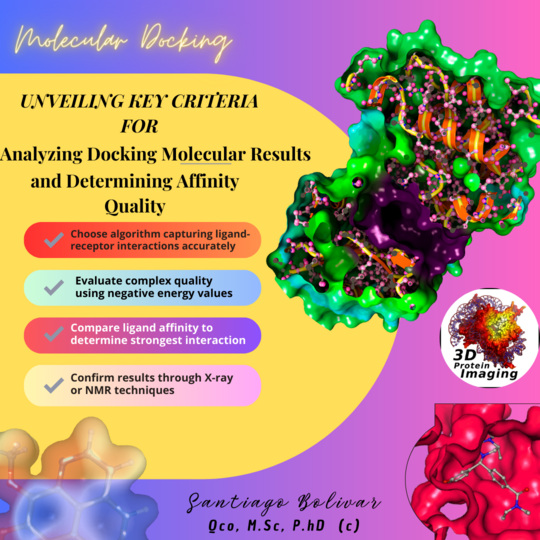

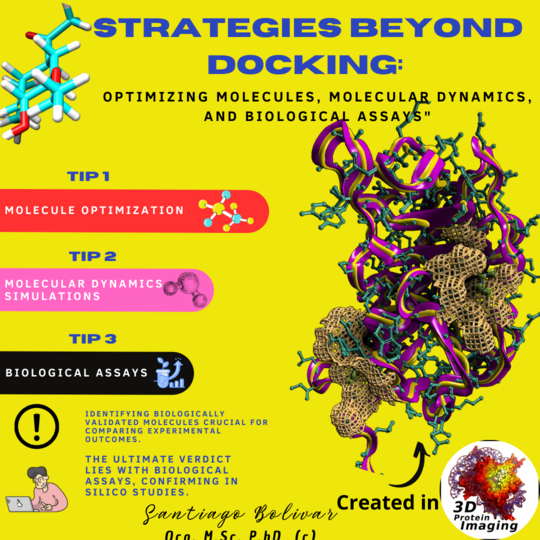